In [ ]:
https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine

In [ ]:
https://www.kaggle.com/kabure/wine-review-s-understanding-pythonic-eda

In [ ]:
https://www.kaggle.com/chocozzz/house-price-prediction-eda-updated-2019-03-12

In [ ]:
https://www.kaggle.com/tmheo74/geo-data-eda-and-feature-engineering#K-Means-Clustering---Lat,-Long

In [ ]:
https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values

In [ ]:
https://www.kaggle.com/dansbecker/handling-missing-values

In [ ]:
https://www.kaggle.com/meikegw/filling-up-missing-values

In [ ]:
https://www.kaggle.com/nikunjm88/carefully-dealing-with-missing-values

In [ ]:
https://rstudio-pubs-static.s3.amazonaws.com/246255_c1ea14b56f8d40c0959d8e9aa46bca34.html

In [ ]:
http://rstudio-pubs-static.s3.amazonaws.com/80458_5000e31f84df449099a872ccf40747b7.html

In [ ]:
https://rstudio-pubs-static.s3.amazonaws.com/142451_096eafe187b34ade916fcbe10bb432b2.html

In [ ]:
https://rpubs.com/szon0111/P4

In [ ]:
https://bibinmjose.github.io/RedWineDataAnalysis/

https://www.kaggle.com/rhodiumbeng/red-wine-analysis

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix



#ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [39]:
data = pd.read_csv('./data/wine_quality_red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Summary statistics

In [40]:
data.shape

(1599, 12)

In [41]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [42]:
data.describe().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


In [43]:
extra = data[data.duplicated()]
extra.shape

(240, 12)

In [44]:
extra.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.9978,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.9962,3.41,0.39,10.9,5


> 240개의 중복이 존재, 

In [45]:
yy = data.quality
X = data.drop('quality', axis=1)
print(y.shape, X.shape)

(1599,) (1599, 11)


In [46]:
# fixed acidity     비휘발성 산
# volatile acidity     휘발성 산
# citric acid     구연산(시트르산)

# ---------------------------------

# residual sugar     잔당
# chlorides     염화물
# free sulfur dioxide     유리 이산화황
# total sulfur dioxide     총 이산화황
# density     밀도
# pH     산도(수소 이온 농도)


# sulphates     황산염


# alcohol     알코올
# ----------------------------------------
# quality     와인 품질(나쁨 : 0 ~ 좋음 : 10)

# 'A' = 35
# 'B' = 10
# 'C' = 15
# 'D' = 25
# 'E' = 15
# 'F' = 20
# 'G' = 30
# 'H' = 10

## Visualization 

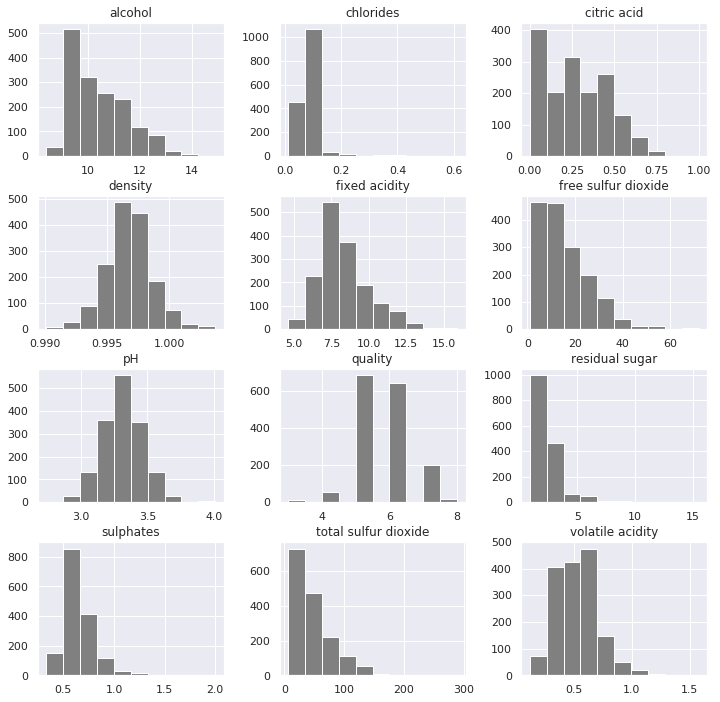

In [47]:
sns.set()
data.hist(figsize=(12,12), color='gray')
plt.show()

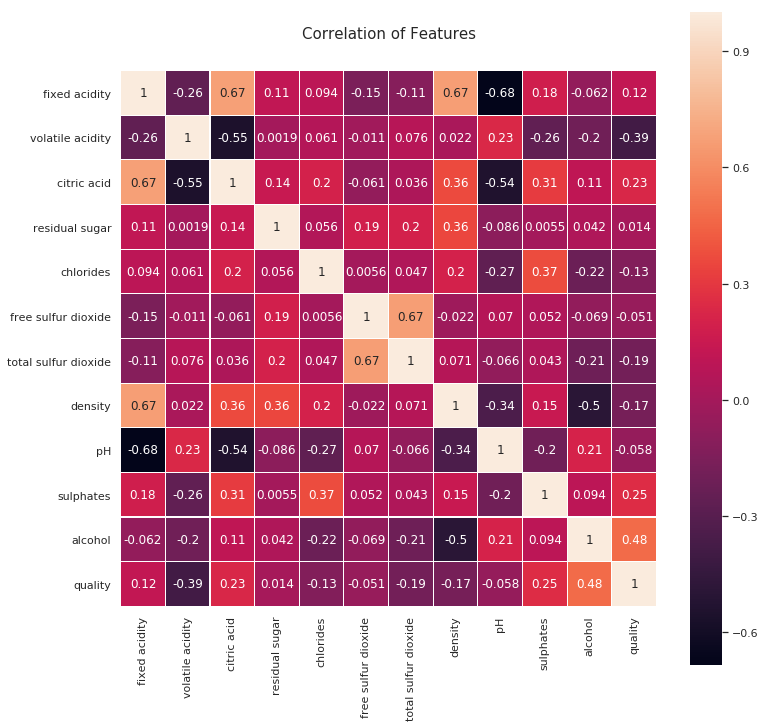

In [48]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True)

['quality' 'alcohol' 'volatile acidity' 'sulphates' 'citric acid'
 'total sulfur dioxide' 'chlorides' 'density' 'fixed acidity'
 'free sulfur dioxide' 'pH' 'residual sugar']


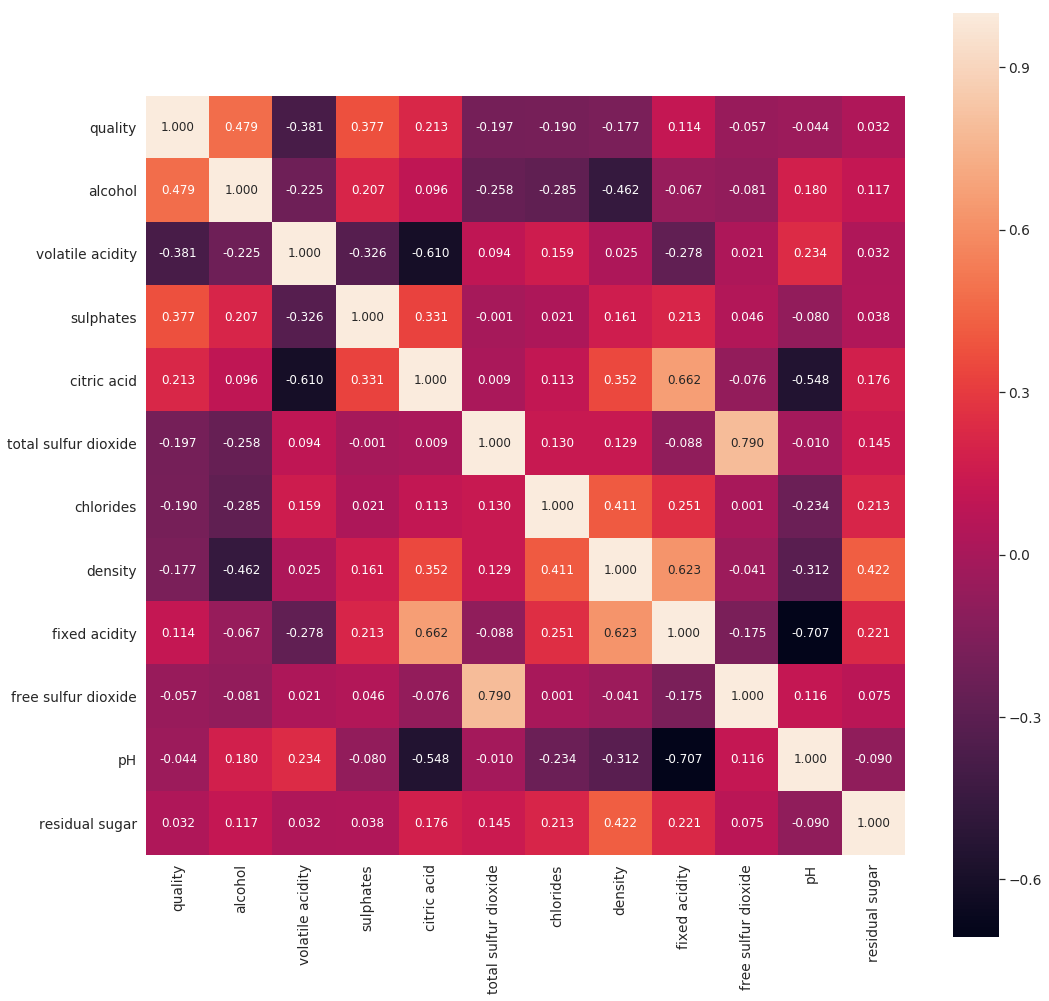

In [49]:
import scipy as sp

cor_abs = abs(data.corr(method='spearman')) 
cor_cols = cor_abs.nlargest(n=15, columns='quality').index # price과 correlation이 높은 column 10개 뽑기(내림차순)

cor = np.array(sp.stats.spearmanr(data[cor_cols].values))[0] # 10 x 10
print(cor_cols.values)
plt.figure(figsize=(17,17))
sns.set(font_scale=1.25)
sns.heatmap(cor.astype(float), fmt='.3f', annot=True, square=True , annot_kws={'size' : 12} ,xticklabels=cor_cols.values, yticklabels=cor_cols.values)

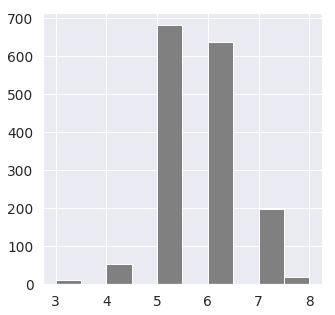

In [54]:
y.hist(figsize=(5,5), color='gray')
plt.show()

> quality     와인 품질(나쁨 : 0 ~ 좋음 : 10)
> 5 이상을 좋은거라고 봄

In [58]:
y1 = (y > 5).astype(int)
y1.head(10)

0    0
1    0
2    0
3    1
4    0
5    0
6    0
7    1
8    1
9    0
Name: quality, dtype: int64

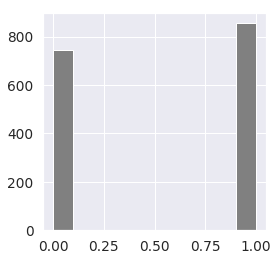

In [61]:
# ax = y1.plot.hist(color='gray')
# ax.set_title('Wine quality distribution', fontsize=14)
# ax.set_xlabel('aggregated target value')

y1.hist(figsize=(4,4), color='gray')
plt.show()

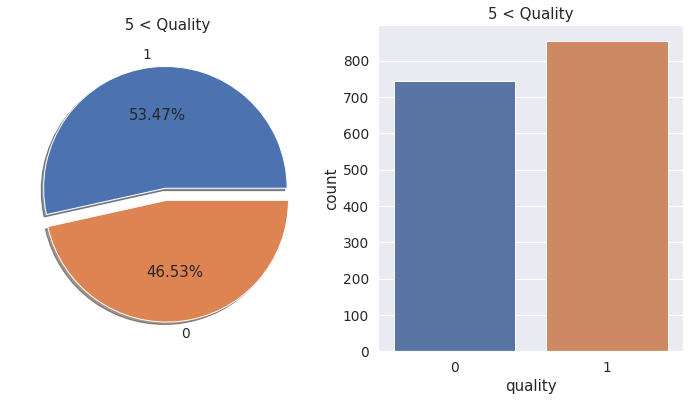

In [84]:
f, ax = plt.subplots(1,2,figsize=(12,6))#도화지

y1.value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.2f%%', ax=ax[0], shadow=True)
ax[0].set_title(' 5 < Quality')
ax[0].set_ylabel('')

sns.countplot(y1, data = data,  ax=ax[1])
ax[1].set_title('5 < Quality')
plt.show()


## Data Devide

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.3, random_state = 9209)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1119, 11) (480, 11) (1119,) (480,)


## RandomForestClassifier

In [92]:
RF_clf = RandomForestClassifier(random_state = 9209)
RF_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=9209, verbose=0,
            warm_start=False)

## train and evaluate

In [98]:
cv_scores = cross_val_score(RF_clf,X_train, y_train, cv=10, scoring='accuracy')

print('The accuracy scores for the iterations are {}'.format(cv_scores))
print('\nThe mean accuracy score is {}'.format(cv_scores.mean().round(6)))
print('\nThe std accuracy score is {}'.format(cv_scores.std().round(6)))


The accuracy scores for the iterations are [0.83185841 0.74336283 0.81415929 0.76106195 0.80357143 0.87387387
 0.72972973 0.74774775 0.81081081 0.77477477]

The mean accuracy score is 0.789095

The std accuracy score is 0.043176


## Perform predictions

In [103]:
RF_clf.fit(X_train, y_train)
pred_RF = RF_clf.predict(X_test)



In [116]:
rate = 0
for i in range(0,20):
    res = (y_test.iloc[i] and pred_RF[i])
    print('Actual quality : ', y_test.iloc[i], '\t predicted : ', pred_RF[i], '\t result : ',  res)
    rate = rate + res
print('{:.3%}'.format((rate/i)))


Actual quality :  1 	 predicted :  1 	 result :  1
Actual quality :  1 	 predicted :  1 	 result :  1
Actual quality :  1 	 predicted :  1 	 result :  1
Actual quality :  1 	 predicted :  0 	 result :  0
Actual quality :  1 	 predicted :  0 	 result :  0
Actual quality :  1 	 predicted :  1 	 result :  1
Actual quality :  1 	 predicted :  1 	 result :  1
Actual quality :  1 	 predicted :  1 	 result :  1
Actual quality :  1 	 predicted :  0 	 result :  0
Actual quality :  1 	 predicted :  1 	 result :  1
Actual quality :  1 	 predicted :  1 	 result :  1
Actual quality :  0 	 predicted :  0 	 result :  0
Actual quality :  1 	 predicted :  1 	 result :  1
Actual quality :  0 	 predicted :  0 	 result :  0
Actual quality :  1 	 predicted :  1 	 result :  1
Actual quality :  0 	 predicted :  0 	 result :  0
Actual quality :  1 	 predicted :  1 	 result :  1
Actual quality :  0 	 predicted :  0 	 result :  0
Actual quality :  1 	 predicted :  1 	 result :  1
Actual quality :  0 	 predicted

## Accuracy, log loss and confusion matrix

In [117]:
print(accuracy_score(y_test, pred_RF))
print(log_loss(y_test, pred_RF))

0.7479166666666667
8.706738171766652


In [118]:
print(confusion_matrix(y_test, pred_RF))

[[166  53]
 [ 68 193]]


> 총 53 + 68 개의 에러, 잘못한 예측이 있는것이다
`121`

## LogisticRegression

In [120]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(random_state=9209)
LR_clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=9209, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## train and evaluate using cross validation

In [122]:
cv_scores = cross_val_score(LR_clf, X_train, y_train, cv=10, scoring='accuracy')

print('The accuracy scores for the iterations are {}'.format(cv_scores))
print('\nThe mean accuracy score is {}'.format(cv_scores.mean().round(6)))
print('\nThe std accuracy score is {}'.format(cv_scores.std().round(6)))

The accuracy scores for the iterations are [0.7699115  0.75221239 0.7699115  0.7079646  0.73214286 0.78378378
 0.7027027  0.71171171 0.76576577 0.73873874]

The mean accuracy score is 0.743485

The std accuracy score is 0.027711


## Perform predictions

In [123]:
LR_clf.fit(X_train, y_train)
pred_LR = LR_clf.predict(X_test)

In [124]:
rate = 0
for i in range(0,20):
    res = (y_test.iloc[i] and pred_RF[i])
    print('Actual quality : ', y_test.iloc[i], '\t predicted : ', pred_LR[i], '\t result : ',  res)
    rate = rate + res
print('{:.3%}'.format((rate/i)))

Actual quality :  1 	 predicted :  1 	 result :  1
Actual quality :  1 	 predicted :  1 	 result :  1
Actual quality :  1 	 predicted :  1 	 result :  1
Actual quality :  1 	 predicted :  1 	 result :  0
Actual quality :  1 	 predicted :  1 	 result :  0
Actual quality :  1 	 predicted :  1 	 result :  1
Actual quality :  1 	 predicted :  0 	 result :  1
Actual quality :  1 	 predicted :  1 	 result :  1
Actual quality :  1 	 predicted :  1 	 result :  0
Actual quality :  1 	 predicted :  1 	 result :  1
Actual quality :  1 	 predicted :  1 	 result :  1
Actual quality :  0 	 predicted :  0 	 result :  0
Actual quality :  1 	 predicted :  1 	 result :  1
Actual quality :  0 	 predicted :  0 	 result :  0
Actual quality :  1 	 predicted :  1 	 result :  1
Actual quality :  0 	 predicted :  0 	 result :  0
Actual quality :  1 	 predicted :  1 	 result :  1
Actual quality :  0 	 predicted :  0 	 result :  0
Actual quality :  1 	 predicted :  1 	 result :  1
Actual quality :  0 	 predicted

In [125]:
print(accuracy_score(y_test, pred_LR))
print(log_loss(y_test, pred_LR))

0.7270833333333333
9.42633266154284


In [126]:
print(confusion_matrix(y_test, pred_LR))

[[144  75]
 [ 56 205]]


> 75 + 56 classification errors
`131` error

>  Logistic Regression Classifier보다 `Random Forest Classifier`가 더 좋은 모습임

In [127]:
from sklearn.model_selection import GridSearchCV
grid_values = {'n_estimators':[50,100,200],'max_depth':[None,30,15,5],
               'max_features':['auto','sqrt','log2'],'min_samples_leaf':[1,20,50,100]}
grid_RF = GridSearchCV(RF_clf,param_grid=grid_values,scoring='accuracy')
grid_RF.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=9209, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 200], 'max_depth': [None, 30, 15, 5], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [1, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [128]:
grid_RF.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [129]:
RF_clf = RandomForestClassifier(n_estimators=200,random_state=9209)
RF_clf.fit(X_train,y_train)
pred_RF = RF_clf.predict(X_test)

In [130]:
print(accuracy_score(y_test,pred_RF))
print(log_loss(y_test,pred_RF))

0.7770833333333333
7.699367188549634


In [131]:
print(confusion_matrix(y_test,pred_RF))

[[160  59]
 [ 48 213]]


> `107` error, 
> hyperparameter tuning 후에 accuracy가 `74.00%`에서  `77.00%` 증가하는 것을 확인,